# Chap09 Excercise Olivetti faces dataset

 *Exercise: The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function.*

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [44]:
from sklearn.datasets import fetch_olivetti_faces

In [45]:
from scipy.io import loadmat

In [46]:
olivetti = fetch_olivetti_faces()

In [47]:
print(olivetti.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [52]:
# olivetti_local =loadmat('../data/olivettifaces.mat')
# olivetti_local.keys()

In [53]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [54]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

 *Exercise: Then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set.*

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit

In [58]:
strat_split = StratifiedShuffleSplit(n_splits=1,test_size=40,random_state=42)
train_valid_idx,test_idx = next(strat_split.split(olivetti.data,olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

In [60]:
strat_split = StratifiedShuffleSplit(n_splits=1,test_size=80,random_state=43)
train_idx,valid_idx = next(strat_split.split(X_train_valid,y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [62]:
# Rethink the stratified sampling here

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape,y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


 To speed things up, we'll reduce the data's dimensionality using PCA:

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(0.99) # 99% of the variance explained, cool
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

In [65]:
pca.n_components_

199

 *Exercise: Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter).*

In [66]:
from sklearn.cluster import KMeans

In [67]:
k_range =range(5,150,5)
kmeans_per_k = []

for k in k_range:
    print(f"f = {k}")
    kmeans = KMeans(n_clusters=k,random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

f = 5
f = 10
f = 15
f = 20
f = 25
f = 30
f = 35
f = 40
f = 45
f = 50
f = 55
f = 60
f = 65
f = 70
f = 75
f = 80
f = 85
f = 90
f = 95
f = 100
f = 105
f = 110
f = 115
f = 120
f = 125
f = 130
f = 135
f = 140
f = 145


In [68]:
from sklearn.metrics import silhouette_score

In [69]:
silhouette_scores = [silhouette_score(X_train_pca,model.labels_) for model in kmeans_per_k]

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

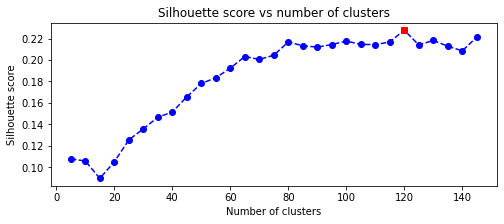

In [71]:
_, ax = plt.subplots(figsize=(8,3))

ax.plot(k_range,silhouette_scores,"bo--")
ax.plot(best_k,best_score,"rs")
ax.set(xlabel="Number of clusters",ylabel="Silhouette score",title="Silhouette score vs number of clusters")

plt.show()

In [72]:
best_k

120